In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
from wordcloud import WordCloud
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.metrics import classification_report
from bs4 import BeautifulSoup
from html import unescape
import re
import html


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
col = ['sentiment','id','date','query','user','text']
df = pd.read_csv("/content/drive/MyDrive/training.1600000.processed.noemoticon.csv",encoding="ISO-8859–1",header=None, names=col)

df

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
df.shape

(1600000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df.nunique()

sentiment          2
id           1598315
date          774363
query              1
user          659775
text         1581466
dtype: int64

In [ ]:
df['sentiment'].value_counts()

sentiment
0    800000
4    800000
Name: count, dtype: int64

## Data Pre-Processing

In [3]:
df.columns

Index(['sentiment', 'id', 'date', 'query', 'user', 'text'], dtype='object')

In [4]:
new_df = df.drop(columns=['id','query','user'])
new_df

,sentiment,date,text
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
2,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,4,Tue Jun 16 08:40:49 PDT 2009,Just woke up. Having no school is the best fee...
1599996,4,Tue Jun 16 08:40:49 PDT 2009,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Tue Jun 16 08:40:49 PDT 2009,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Tue Jun 16 08:40:49 PDT 2009,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
new_df['pre_clean_length'] = new_df['text'].apply(len)
new_df

,sentiment,date,text,pre_clean_length
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,111
2,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,89
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,47
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",111
...,...,...,...,...
1599995,4,Tue Jun 16 08:40:49 PDT 2009,Just woke up. Having no school is the best fee...,56
1599996,4,Tue Jun 16 08:40:49 PDT 2009,TheWDB.com - Very cool to hear old Walt interv...,78
1599997,4,Tue Jun 16 08:40:49 PDT 2009,Are you ready for your MoJo Makeover? Ask me f...,57
1599998,4,Tue Jun 16 08:40:49 PDT 2009,Happy 38th Birthday to my boo of alll time!!! ...,65


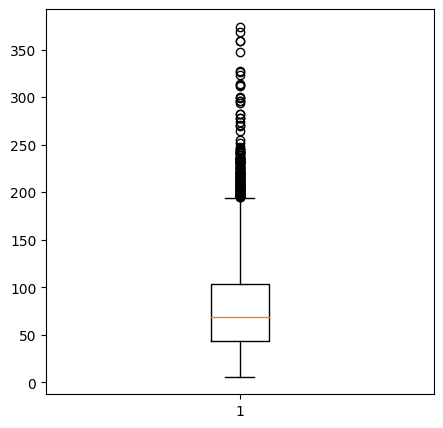

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(new_df.pre_clean_length)
plt.show()

Maximum length of a tweet is 140 characters, but the boxplot shows that there are tweets with more than 140 characters. That means we need to clean them.

In [7]:
new_df[new_df.pre_clean_length > 140].head(10)

,sentiment,date,text,pre_clean_length
213,0,Mon Apr 06 22:33:35 PDT 2009,Awwh babs... you look so sad underneith that s...,142
226,0,Mon Apr 06 22:35:44 PDT 2009,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Mon Apr 06 22:38:18 PDT 2009,Whinging. My client&amp;boss don't understand ...,145
343,0,Mon Apr 06 22:42:49 PDT 2009,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,Mon Apr 06 22:46:57 PDT 2009,#3 woke up and was having an accident - &quot;...,144
464,0,Mon Apr 06 22:51:46 PDT 2009,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,Mon Apr 06 22:52:56 PDT 2009,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Mon Apr 06 23:11:06 PDT 2009,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Mon Apr 06 23:25:42 PDT 2009,Damnit I was really digging this season of Rea...,141
1064,0,Mon Apr 06 23:33:55 PDT 2009,Why do I keep looking...I know that what I rea...,141


In [8]:
new_df['sentiment'].replace(4, 1, inplace=True)

In [9]:
new_df.text[343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [10]:
from bs4 import BeautifulSoup
from html import unescape

soup = BeautifulSoup(unescape(new_df.text[343]), 'lxml')
soup.text

'@TheLeagueSF Not Fun & Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted & clamped down '

In [11]:
import re
import html
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [12]:
new_df.text[0]
re.sub('https?://[A-Za-z0-9./]+','',df.text[0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [13]:
def preprocess(textdata):

  emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

  soup = BeautifulSoup(unescape(textdata), 'lxml')
  textdata = soup.get_text()
  textdata = textdata.lower()
  textdata = re.sub(r'@[A-Za-z0-9_]+','',textdata)
  urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
  textdata = re.sub(urlPattern,'',textdata)
  for emoji in emojis.keys():
      textdata = textdata.replace(emoji, "EMOJI" + emojis[emoji])
  letters_only = re.sub(r"[^a-zA-Z']", " ", textdata)
  letters_only = re.sub(r"\b'\b", "", letters_only)

  words = tok.tokenize(letters_only)
  return (" ".join(words)).strip()


def remove_stop_words(textdata):
    stop_words = ['i','im' 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're","youre","youll", "you've", "you'll", "you'd","youd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", "shes",'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll","thatll" 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 's', 't', 'can', 'will', 'just', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',  'ma']
    words = textdata.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    textdata = ' '.join(filtered_words)
    return textdata


def lemmatize(textdata):
    lemmatizer = WordNetLemmatizer()
    words = textdata.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    textdata = ' '.join(lemmatized_words)
    return textdata

In [14]:
clean_tweets = []
for tweet in new_df.text:
    clean_tweet = preprocess(tweet)
    #clean_tweet = remove_stop_words(clean_tweet)
    clean_tweet = lemmatize(clean_tweet)
    clean_tweets.append(clean_tweet)

clean_df = pd.DataFrame(clean_tweets,columns=['text'])
clean_df['sentiment'] = new_df.sentiment
clean_df.head(10)


<ipython-input-13-a0eaa2b5cd60>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(unescape(textdata), 'lxml')


,text,sentiment
0,awww thats a bummer you shoulda got david carr...,0
1,is upset that he cant update his facebook by t...,0
2,i dived many time for the ball managed to save...,0
3,my whole body feel itchy and like it on fire,0
4,no it not behaving at all im mad why am i here...,0
5,not the whole crew,0
6,need a hug,0
7,hey long time no see yes rain a bit only a bit...,0
8,nope they didnt have it,0
9,que me muera,0


## Model Training & Evaluation

In [15]:
clean_df.to_csv('/content/drive/MyDrive/clean_tweets_withstopwords.csv', index= False)

In [3]:
clean_df = pd.read_csv('/content/drive/MyDrive/clean_tweets_withstopwords.csv')
clean_df.head()

,text,sentiment
0,awww thats a bummer you shoulda got david carr...,0
1,is upset that he cant update his facebook by t...,0
2,i dived many time for the ball managed to save...,0
3,my whole body feel itchy and like it on fire,0
4,no it not behaving at all im mad why am i here...,0


In [4]:
clean_df.dropna(inplace=True)
clean_df.isnull().sum()

,0
text,0
sentiment,0


In [5]:
from sklearn.model_selection import train_test_split
X = clean_df['text']
y = clean_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer(ngram_range=(1,2))
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model5 = LogisticRegression(max_iter=1000)
model5.fit(tf_x_train, y_train)
y_pred5 = model5.predict(tf_x_test)
cf = classification_report(y_test, y_pred5)
print(cf)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82    159213
           1       0.82      0.83      0.83    160041

    accuracy                           0.82    319254
   macro avg       0.82      0.82      0.82    319254
weighted avg       0.82      0.82      0.82    319254



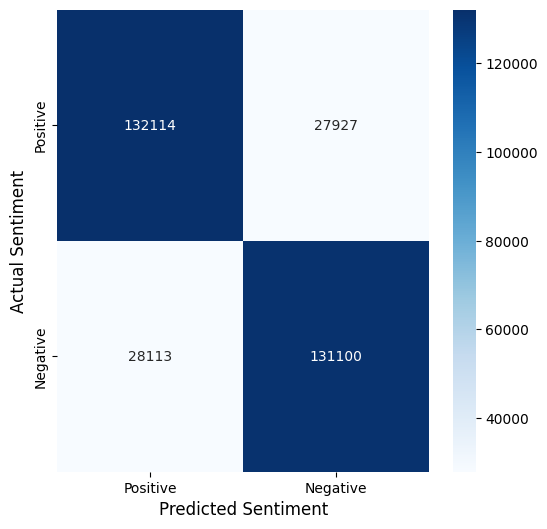

In [8]:
from sklearn import metrics
import seaborn as sns
conf_matrix = metrics.confusion_matrix(y_test, y_pred5, labels=[1, 0])
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="Blues", xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Sentiment', fontsize=12)
plt.ylabel('Actual Sentiment', fontsize=12)
plt.show()

4-grams


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
model = LogisticRegression(max_iter=1000)
model.fit(tf_x_train, y_train)
y_pred = model.predict(tf_x_test)
cf = classification_report(y_test, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.80      0.85      0.83    159213
           1       0.84      0.79      0.82    160041

    accuracy                           0.82    319254
   macro avg       0.82      0.82      0.82    319254
weighted avg       0.82      0.82      0.82    319254



3-grams

In [9]:
vectorizer1= TfidfVectorizer(ngram_range=(1,3))
tf_x_train1 = vectorizer1.fit_transform(X_train)
tf_x_test1 = vectorizer1.transform(X_test)
model1 = LogisticRegression(max_iter=1000)
model1.fit(tf_x_train1, y_train)
y_pred = model1.predict(tf_x_test1)
cf = classification_report(y_test, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83    159213
           1       0.83      0.81      0.82    160041

    accuracy                           0.82    319254
   macro avg       0.82      0.82      0.82    319254
weighted avg       0.82      0.82      0.82    319254



In [11]:
def predict_sentiment(review):
  clean_tweet = preprocess(review)
  #clean_tweet = remove_stop_words(clean_tweet)
  clean_tweet = lemmatize(clean_tweet)
  clean_tweet = vectorizer.transform([clean_tweet])
  sent = model5.predict(clean_tweet)
  return sent


In [15]:
tweet ="""I hate Delhi Metro! There's always a rush 😔"""

tweet_sent= predict_sentiment(tweet)

if tweet_sent == 1:
  print("Positive")
else:
  print("Negative")

Negative
